# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

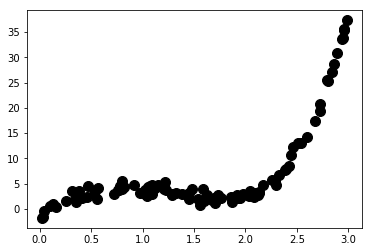

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ -0.36189901,  -0.36024711,   1.65583883,   7.69317318,
         7.00926836,   2.27625892,  -0.36290314,   3.0762912 ,
         1.4949427 ,   0.09518335,   1.38373932,   5.65243853,
         6.06904888,  -0.35555825,   3.35738632,  23.50959731,
         0.1634964 ,   8.74889387,   8.81450945,   3.70684989,
         2.19316355,  -0.36037658,  11.14716419,  -0.34640181,
        27.83448546,  15.23544883,   4.40161982,   0.07844828,
        13.880422  ,   7.47895627,   8.89410883,   0.15970405,
         9.46833213,  20.39073494,   0.90426633,  -0.13659165,
        18.40786152,  27.54862253,  14.35274205,  -0.23119861])

In [6]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.6856553164060015
Explained variance score: 0.6871659667453758
Median absolute error: 4.007133921148091
Mean squared error: 19.79406666339449
Mean absolute errors: 3.971212959922781


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
R^2: 0.40558232716973974
Explained variance score: 0.4096153770944363
Median absolute error: 5.004032685147038
Mean squared error: 37.430068507532496
Mean absolute errors: 5.034052498969905
PR2
R^2: 0.6856553164060015
Explained variance score: 0.6871659667453758
Median absolute error: 4.007133921148091
Mean squared error: 19.79406666339449
Mean absolute errors: 3.971212959922781
PR3
R^2: 0.9786741433849244
Explained variance score: 0.9791441483979337
Median absolute error: 0.8535856375275848
Mean squared error: 1.3428743971951707
Mean absolute errors: 0.9533667164640228
PR4
R^2: 0.9885819614616334
Explained variance score: 0.9885868258371777
Median absolute error: 0.5990211455011858
Mean squared error: 0.7189859660090429
Mean absolute errors: 0.6915504635427173
PR5
R^2: 0.9885034347441961
Explained variance score: 0.9885055622874185
Median absolute error: 0.5988168921059944
Mean squared error: 0.7239307389316736
Mean absolute errors: 0.6948245987333175
PR6
R^2: 0.9888839679788503
Ex